In [1]:
import pandas as pd

In [2]:
file_path = r'C:\Users\Girivelan R\Downloads\USPTO\case_file.csv'

In [3]:
import os

file_path = r"C:\Users\Girivelan R\Downloads\USPTO\case_file.csv"

if os.path.exists(file_path):
    print("File found! Ready to load.")
else:
    print("File not found! Check the file path.")

File found! Ready to load.


In [4]:
df_chunks = pd.read_csv(file_path, chunksize=100000, engine="python", on_bad_lines="skip")
df_sample = next(df_chunks)  # Load first chunk
print(df_sample.head())

   serial_no  abandon_dt  amend_reg_dt  amend_lb_for_app_in  \
0   60000001         NaN           NaN                    0   
1   60000002         NaN           NaN                    0   
2   60000003         NaN           NaN                    0   
3   60000004         NaN           NaN                    0   
4   60000005         NaN           NaN                    0   

   amend_lb_for_reg_in  amend_lb_itu_in  amend_lb_use_in  reg_cancel_cd  \
0                    0                0                0            NaN   
1                    0                0                0            NaN   
2                    0                0                0            NaN   
3                    0                0                0            NaN   
4                    0                0                0            NaN   

   reg_cancel_dt  cancel_pend_in  ...  ir_registration_dt  ir_registration_no  \
0            NaN               0  ...                 NaN                 NaN   
1       

In [5]:
# Check for missing values
missing_values = df_sample.isnull().sum()
print(missing_values)


serial_no                   0
abandon_dt             100000
amend_reg_dt           100000
amend_lb_for_app_in         0
amend_lb_for_reg_in         0
                        ...  
ir_priority_dt         100000
ir_priority_in         100000
related_other_in       100000
registration_no             0
tad_file_id                 0
Length: 79, dtype: int64


In [6]:
print(df_sample.columns)

Index(['serial_no', 'abandon_dt', 'amend_reg_dt', 'amend_lb_for_app_in',
       'amend_lb_for_reg_in', 'amend_lb_itu_in', 'amend_lb_use_in',
       'reg_cancel_cd', 'reg_cancel_dt', 'cancel_pend_in', 'cert_mark_in',
       'chg_reg_in', 'coll_memb_mark_in', 'coll_serv_mark_in',
       'coll_trade_mark_in', 'draw_color_cur_in', 'draw_color_file_in',
       'concur_use_in', 'concur_use_pend_in', 'file_location',
       'draw_3d_cur_in', 'draw_3d_file_in', 'exm_attorney_name',
       'lb_use_file_in', 'lb_for_app_cur_in', 'lb_for_reg_cur_in',
       'lb_intl_reg_cur_in', 'lb_for_app_file_in', 'lb_for_reg_file_in',
       'lb_intl_reg_file_in', 'lb_none_cur_in', 'filing_dt', 'for_priority_in',
       'lb_itu_cur_in', 'lb_itu_file_in', 'interfer_pend_in', 'exm_office_cd',
       'file_location_dt', 'mark_draw_cd', 'mark_id_char', 'opposit_pend_in',
       'amend_principal_in', 'concur_use_pub_in', 'publication_dt',
       'registration_dt', 'renewal_dt', 'renewal_file_in', 'repub_12c_dt',
 

In [7]:
df_sample['registration_dt'].fillna('1900-01-01', inplace=True)
print(df_sample.isnull().sum())

serial_no                   0
abandon_dt             100000
amend_reg_dt           100000
amend_lb_for_app_in         0
amend_lb_for_reg_in         0
                        ...  
ir_priority_dt         100000
ir_priority_in         100000
related_other_in       100000
registration_no             0
tad_file_id                 0
Length: 79, dtype: int64


C:\Users\Girivelan R\AppData\Local\Temp\ipykernel_17036\3855775168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sample['registration_dt'].fillna('1900-01-01', inplace=True)


In [8]:
df_sample['file_location'].fillna('Unknown', inplace=True)
df_sample['file_location_dt'].fillna('1900-01-01', inplace=True)
df_sample['mark_draw_cd'].fillna('Unknown', inplace=True)

# Check again for any missing values
print(df_sample.isnull().sum())


serial_no                   0
abandon_dt             100000
amend_reg_dt           100000
amend_lb_for_app_in         0
amend_lb_for_reg_in         0
                        ...  
ir_priority_dt         100000
ir_priority_in         100000
related_other_in       100000
registration_no             0
tad_file_id                 0
Length: 79, dtype: int64


C:\Users\Girivelan R\AppData\Local\Temp\ipykernel_17036\606401102.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sample['file_location'].fillna('Unknown', inplace=True)
C:\Users\Girivelan R\AppData\Local\Temp\ipykernel_17036\606401102.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [9]:
# Check for duplicate rows based on 'serial_no'
duplicates = df_sample[df_sample.duplicated(subset=['serial_no'], keep=False)]
print(f"Number of duplicate entries: {duplicates.shape[0]}")
print(duplicates.head())  # Show some of the duplicate rows


Number of duplicate entries: 0
Empty DataFrame
Columns: [serial_no, abandon_dt, amend_reg_dt, amend_lb_for_app_in, amend_lb_for_reg_in, amend_lb_itu_in, amend_lb_use_in, reg_cancel_cd, reg_cancel_dt, cancel_pend_in, cert_mark_in, chg_reg_in, coll_memb_mark_in, coll_serv_mark_in, coll_trade_mark_in, draw_color_cur_in, draw_color_file_in, concur_use_in, concur_use_pend_in, file_location, draw_3d_cur_in, draw_3d_file_in, exm_attorney_name, lb_use_file_in, lb_for_app_cur_in, lb_for_reg_cur_in, lb_intl_reg_cur_in, lb_for_app_file_in, lb_for_reg_file_in, lb_intl_reg_file_in, lb_none_cur_in, filing_dt, for_priority_in, lb_itu_cur_in, lb_itu_file_in, interfer_pend_in, exm_office_cd, file_location_dt, mark_draw_cd, mark_id_char, opposit_pend_in, amend_principal_in, concur_use_pub_in, publication_dt, registration_dt, renewal_dt, renewal_file_in, repub_12c_dt, repub_12c_in, incontest_ack_in, incontest_file_in, acq_dist_in, acq_dist_part_in, use_afdv_acc_in, use_afdv_file_in, use_afdv_par_acc_in, 

In [11]:
# Check the current data types
print(df_sample.dtypes)

df_sample['serial_no'] = df_sample['serial_no'].astype('int64')
df_sample['amend_lb_for_app_in'] = df_sample['amend_lb_for_app_in'].astype('int8')

serial_no                int64
abandon_dt             float64
amend_reg_dt           float64
amend_lb_for_app_in       int8
amend_lb_for_reg_in      int64
                        ...   
ir_priority_dt         float64
ir_priority_in         float64
related_other_in       float64
registration_no          int64
tad_file_id              int64
Length: 79, dtype: object


In [12]:
print(df_sample.dtypes)

serial_no                int64
abandon_dt             float64
amend_reg_dt           float64
amend_lb_for_app_in       int8
amend_lb_for_reg_in      int64
                        ...   
ir_priority_dt         float64
ir_priority_in         float64
related_other_in       float64
registration_no          int64
tad_file_id              int64
Length: 79, dtype: object


In [13]:
df_sample['serial_no'] = df_sample['serial_no'].astype('int64')
df_sample['amend_lb_for_app_in'] = df_sample['amend_lb_for_app_in'].astype('int8')

In [14]:
print(df_sample.dtypes)

serial_no                int64
abandon_dt             float64
amend_reg_dt           float64
amend_lb_for_app_in       int8
amend_lb_for_reg_in      int64
                        ...   
ir_priority_dt         float64
ir_priority_in         float64
related_other_in       float64
registration_no          int64
tad_file_id              int64
Length: 79, dtype: object


In [15]:
df_sample['file_location'] = df_sample['file_location'].astype('category')

df_sample['file_location_dt'] = pd.to_datetime(df_sample['file_location_dt'], errors='coerce')
df_sample['registration_dt'] = pd.to_datetime(df_sample['registration_dt'], errors='coerce')
df_sample['cfh_status_dt'] = pd.to_datetime(df_sample['cfh_status_dt'], errors='coerce')

df_sample['mark_draw_cd'] = df_sample['mark_draw_cd'].astype('category')

In [16]:
# Checking for outliers in numeric columns
numeric_cols = df_sample.select_dtypes(include=['int64']).columns

for col in numeric_cols:
    Q1 = df_sample[col].quantile(0.25)
    Q3 = df_sample[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_sample[(df_sample[col] < lower_bound) | (df_sample[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]} rows")

Outliers in serial_no: 0 rows
Outliers in amend_lb_for_reg_in: 0 rows
Outliers in amend_lb_itu_in: 0 rows
Outliers in amend_lb_use_in: 0 rows
Outliers in cancel_pend_in: 0 rows
Outliers in cert_mark_in: 0 rows
Outliers in chg_reg_in: 0 rows
Outliers in coll_memb_mark_in: 0 rows
Outliers in coll_serv_mark_in: 0 rows
Outliers in coll_trade_mark_in: 0 rows
Outliers in draw_color_cur_in: 0 rows
Outliers in draw_color_file_in: 0 rows
Outliers in concur_use_in: 0 rows
Outliers in concur_use_pend_in: 0 rows
Outliers in draw_3d_cur_in: 0 rows
Outliers in draw_3d_file_in: 0 rows
Outliers in lb_use_file_in: 0 rows
Outliers in lb_for_app_cur_in: 0 rows
Outliers in lb_for_reg_cur_in: 0 rows
Outliers in lb_intl_reg_cur_in: 0 rows
Outliers in lb_for_app_file_in: 0 rows
Outliers in lb_for_reg_file_in: 0 rows
Outliers in lb_intl_reg_file_in: 0 rows
Outliers in lb_none_cur_in: 0 rows
Outliers in for_priority_in: 0 rows
Outliers in lb_itu_cur_in: 0 rows
Outliers in lb_itu_file_in: 0 rows
Outliers in int

In [17]:
# Checking for unrealistic date values
df_sample['registration_dt'] = pd.to_datetime(df_sample['registration_dt'], errors='coerce')
unrealistic_dates = df_sample[df_sample['registration_dt'] > pd.to_datetime('2025-12-31')]
print(f"Unrealistic registration_dt dates: {unrealistic_dates.shape[0]}")

Unrealistic registration_dt dates: 0


In [18]:
df_sample = df_sample[df_sample['use_afdv_file_in'] <= df_sample['use_afdv_file_in'].quantile(0.95)]

df_sample = df_sample[df_sample['cfh_status_cd'] <= df_sample['cfh_status_cd'].quantile(0.95)]

print(f"Remaining rows: {df_sample.shape[0]}")


Remaining rows: 99981


In [19]:
df_sample['registration_dt'] = pd.to_datetime(df_sample['registration_dt'], errors='coerce')
print(df_sample[['registration_dt']].dtypes)

registration_dt    datetime64[ns]
dtype: object


In [20]:
# Check for missing or invalid entries in 'file_location_dt'
df_sample['file_location_dt'] = pd.to_datetime(df_sample['file_location_dt'], errors='coerce')

print(df_sample['file_location_dt'].isnull().sum())

0


In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\girivelan r\appdata\local\programs\python\python313\lib\site-packages (0.13.2)




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: num must be an integer with 1 <= num <= 20, not 21

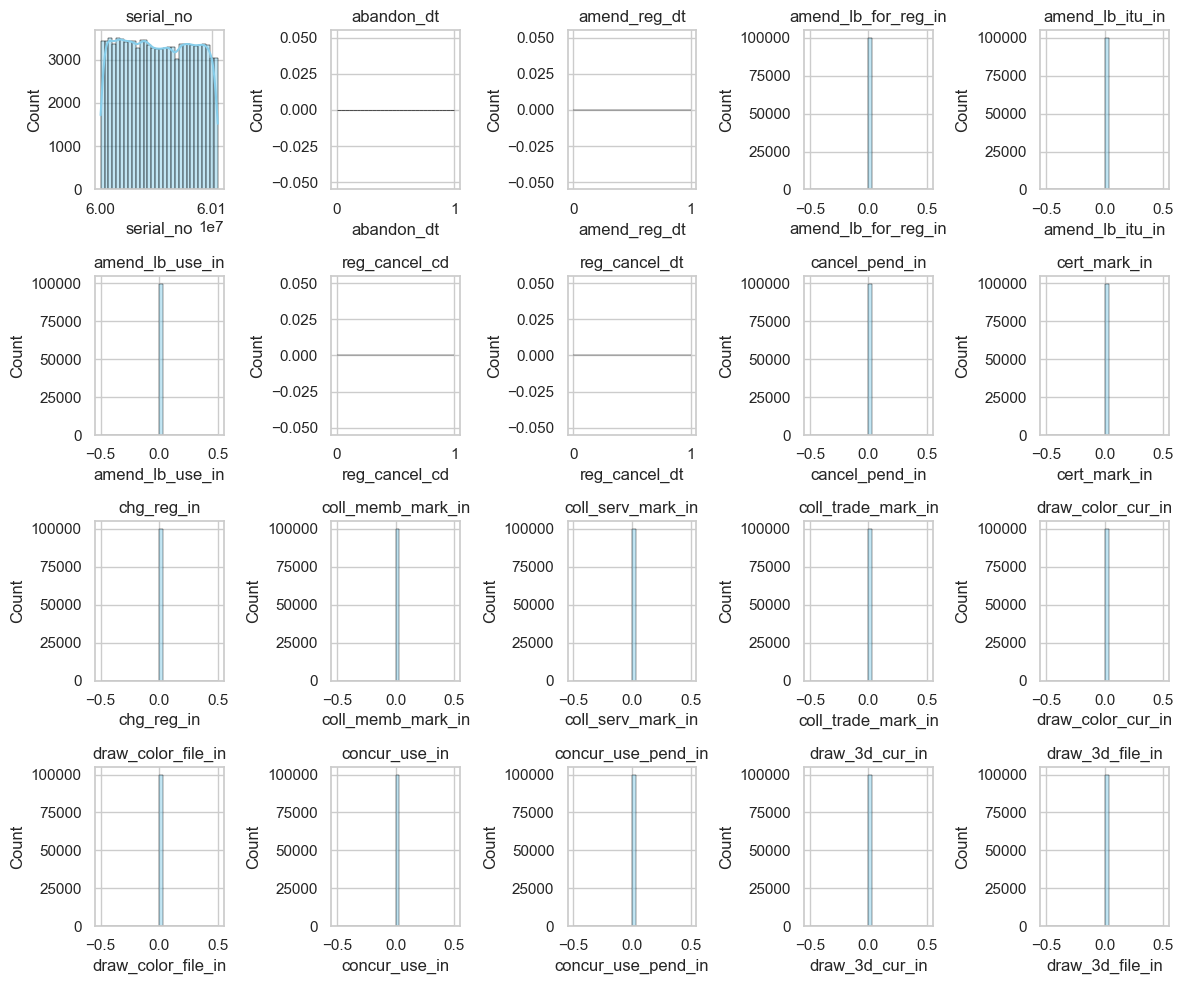

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style for better visuals
sns.set(style="whitegrid")

# Select numeric columns
numeric_columns = df_sample.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column with attractive visualization
plt.figure(figsize=(12, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 5, i+1)  # Adjust grid layout based on the number of columns
    sns.histplot(df_sample[column], kde=True, color='skyblue', bins=30, edgecolor='black')
    plt.title(f'{column}', fontsize=12)
    plt.tight_layout()

# Display the title and show the plot
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.subplots_adjust(top=0.92)  # Adjust title position
plt.show()


In [24]:
import numpy as np

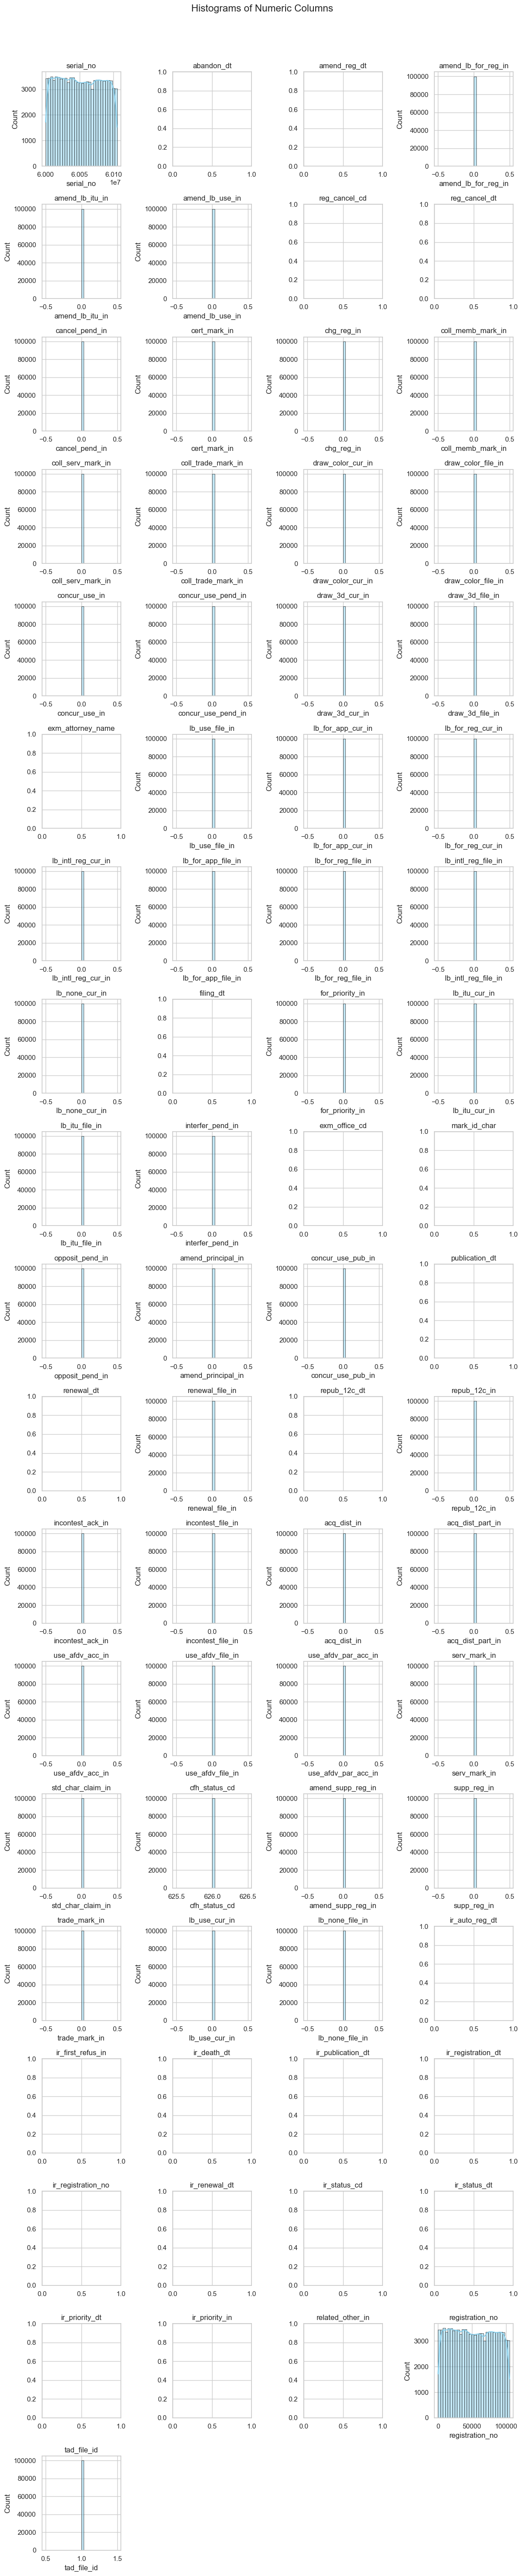

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the Seaborn style for better visuals
sns.set(style="whitegrid")

# Select numeric columns
numeric_columns = df_sample.select_dtypes(include=['int64', 'float64']).columns

# Check if numeric columns exist
if len(numeric_columns) == 0:
    print("No numeric columns found in the dataset.")
else:
    # Determine number of rows & columns for subplots dynamically
    num_cols = len(numeric_columns)
    num_rows = int(np.ceil(num_cols / 4))  # 4 columns per row

    plt.figure(figsize=(12, num_rows * 3))  # Adjust figure height dynamically

    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, 4, i)  # Dynamic subplot grid
        sns.histplot(df_sample[column].dropna(), kde=True, color='skyblue', bins=30, edgecolor='black')
        plt.title(column, fontsize=12)
    
    plt.tight_layout()
    plt.suptitle('Histograms of Numeric Columns', fontsize=16, y=1.02)  # Adjust title position
    plt.show()


In [27]:

print("\nAfter Transformation:")
print(df_sample.describe())



After Transformation:
          serial_no  abandon_dt  amend_reg_dt  amend_lb_for_app_in  \
count  9.998100e+04         0.0           0.0              99981.0   
mean   6.005203e+07         NaN           NaN                  0.0   
min    6.000000e+07         NaN           NaN                  0.0   
25%    6.002550e+07         NaN           NaN                  0.0   
50%    6.005163e+07         NaN           NaN                  0.0   
75%    6.007853e+07         NaN           NaN                  0.0   
max    6.010545e+07         NaN           NaN                  0.0   
std    3.043868e+04         NaN           NaN                  0.0   

       amend_lb_for_reg_in  amend_lb_itu_in  amend_lb_use_in  reg_cancel_cd  \
count              99981.0          99981.0          99981.0            0.0   
mean                   0.0              0.0              0.0            NaN   
min                    0.0              0.0              0.0            NaN   
25%                    0.0    

In [30]:
%matplotlib inline


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid", palette="pastel")  # Change theme


In [32]:
plt.figure(figsize=(12, 6))  # Adjust width & height


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [33]:
!pip install --upgrade seaborn matplotlib



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import seaborn as sns
import matplotlib

print("Seaborn Version:", sns.__version__)
print("Matplotlib Version:", matplotlib.__version__)


Seaborn Version: 0.13.2
Matplotlib Version: 3.10.0


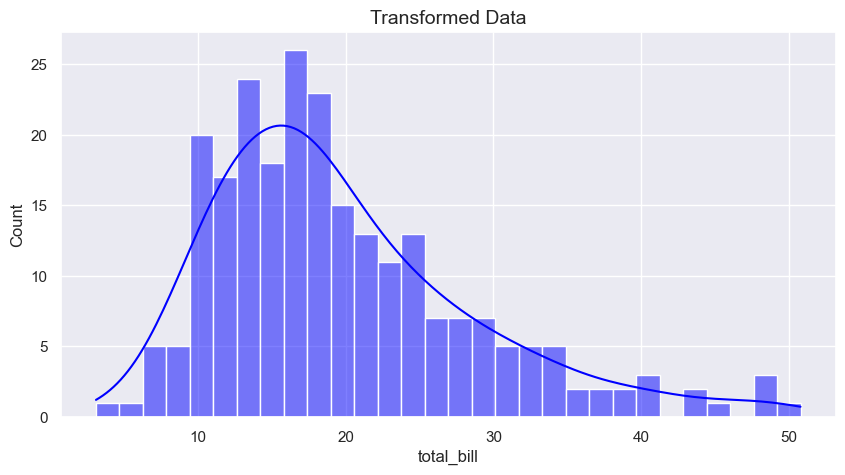

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid", palette="pastel")

# Load sample dataset
tips = sns.load_dataset("tips")

# Create a histogram
plt.figure(figsize=(10, 5))
sns.histplot(tips['total_bill'], kde=True, bins=30, color='blue')
plt.title("Transformed Data", fontsize=14)
plt.show()
